In [1]:
%store -r __toolboxforsalesdata

In [2]:
__toolboxforsalesdata

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Wait, I was dropping unique. Wtf, Time component drop kar raha tha? Seriously?
#Dont repeat fucker.

In [164]:
train_full = pd.read_csv('train_full_lag_1_2_3_imputed_rem_unique_0_1_2.csv')

In [328]:
test_full = pd.read_csv('test_lag1_lag2_lag3_imputed_5_neigh.csv')

In [166]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean,lag3_only_item_cat,lag3_shop_item_comb,lag3_only_item
0,2,31,3,699.0,1.0,37,False,1.0,219.0,6088.0,1.619255,4.0,13.652174,-0.063765,1.578020,6094.0,0.0,0.0
1,2,464,3,299.0,1.0,49,False,0.0,53.0,1039.0,2.299790,0.0,2.521739,-0.063765,2.107505,939.0,0.0,38.0
2,2,482,3,3300.0,1.0,73,False,1.0,131.0,764.0,2.940711,1.0,4.137931,-0.063765,2.662021,677.0,1.0,118.0
3,2,484,3,300.0,3.0,73,False,2.0,130.0,764.0,2.940711,4.0,5.128205,-0.063765,2.662021,677.0,2.0,176.0
4,2,485,3,300.0,2.0,73,False,0.0,114.0,764.0,2.940711,0.0,0.000000,-0.063765,2.662021,677.0,0.0,0.0


In [167]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,unique,...,prev_month_category_mean,item_price,neighbor1,neighbor2,neighbor3,neighbor4,neighbor5,lag3_only_item,lag3_shop_item_comb,lag3_only_item_cat
0,0,5,5037,19.0,1,False,0.00,25.0,2443.00,34,...,1.652909,1960.580473,0,2487,1935,5,4828,119.00,3.0,4667.00
1,1,5,5320,NaN,0,0.5,0.25,10.5,2904.00,34,...,0.675349,147.724437,1,8,3516,1576,2480,19.75,1.0,3011.00
2,2,5,5233,19.0,2,False,1.00,42.0,2443.00,34,...,1.652909,844.516003,2,3,3512,2844,966,150.00,1.0,4667.00
3,3,5,5232,23.0,1,False,0.00,28.0,2203.00,34,...,1.651424,792.527697,3,2,3512,2844,966,65.00,1.0,3650.00
4,4,5,5268,NaN,0,0.0,0.25,3.5,1634.25,34,...,1.804027,1115.985824,4,965,2843,3920,4373,6.50,0.0,2510.25


In [168]:
#Features of categories. The 8 main categories.
item_cats = pd.read_csv('item_categories.csv')

In [169]:
item_cats.head(11)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [170]:
item_cats.iloc[25:,:]

,item_category_name,item_category_id
25,Игры - Аксессуары для игр,25
26,Игры Android - Цифра,26
27,Игры MAC - Цифра,27
28,Игры PC - Дополнительные издания,28
29,Игры PC - Коллекционные издания,29
30,Игры PC - Стандартные издания,30
31,Игры PC - Цифра,31
32,"Карты оплаты (Кино, Музыка, Игры)",32
33,Карты оплаты - Live!,33
34,Карты оплаты - Live! (Цифра),34


In [171]:
category_map = {}

In [172]:
for i in range(1,8):
    category_map[item_cats['item_category_id'][i]] = 'Accessories'

In [173]:
for i in range(10,18):
    category_map[item_cats['item_category_id'][i]] = 'Game Consoles'

In [174]:
for i in range(18,25):
    category_map[item_cats['item_category_id'][i]] = 'Console Games'

In [175]:
for i in range(28,32):
    category_map[item_cats['item_category_id'][i]] = 'PC Games'

In [176]:
for i in range(32,37):
    category_map[item_cats['item_category_id'][i]] = 'Card'

In [177]:
for i in range(37,42):
    category_map[item_cats['item_category_id'][i]] = 'Movie'

In [178]:
for i in range(42,55):
    category_map[item_cats['item_category_id'][i]] = 'Books'

In [179]:
for i in range(55,61):
    category_map[item_cats['item_category_id'][i]] = 'Music'

In [180]:
for i in range(61,73):
    category_map[item_cats['item_category_id'][i]] = 'Gifts'

In [181]:
for i in range(73,79):
    category_map[item_cats['item_category_id'][i]] = 'Soft'

In [182]:
for i in range(81,83):
    category_map[item_cats['item_category_id'][i]] = 'Clean'

In [183]:
#Those left out fill anything
category_map[item_cats['item_category_id'][8]] = 'Tickets'
category_map[item_cats['item_category_id'][9]] = 'Delivery'
category_map[item_cats['item_category_id'][25]] = 'Other Games'
category_map[item_cats['item_category_id'][26]] = 'Other Games'
category_map[item_cats['item_category_id'][27]] = 'Other Games'
category_map[item_cats['item_category_id'][79]] = 'Service'
category_map[item_cats['item_category_id'][80]] = 'Service'
category_map[item_cats['item_category_id'][83]] = 'Elements'

In [185]:
#Okay now I have to map it to item_category_id

In [334]:
test_full['meta_item_cat'] = test_full['item_category_id'].map(category_map)

In [188]:
test_full

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,unique,...,item_price,neighbor1,neighbor2,neighbor3,neighbor4,neighbor5,lag3_only_item,lag3_shop_item_comb,lag3_only_item_cat,meta_item
0,0,5,5037,19.0,1,False,0.00,25.00,2443.00,34,...,1960.580473,0,2487,1935,5,4828,119.00,3.0,4667.00,Console Games
1,1,5,5320,NaN,0,0.5,0.25,10.50,2904.00,34,...,147.724437,1,8,3516,1576,2480,19.75,1.0,3011.00,NaN
2,2,5,5233,19.0,2,False,1.00,42.00,2443.00,34,...,844.516003,2,3,3512,2844,966,150.00,1.0,4667.00,Console Games
3,3,5,5232,23.0,1,False,0.00,28.00,2203.00,34,...,792.527697,3,2,3512,2844,966,65.00,1.0,3650.00,Console Games
4,4,5,5268,NaN,0,0.0,0.25,3.50,1634.25,34,...,1115.985824,4,965,2843,3920,4373,6.50,0.0,2510.25,NaN
5,5,5,5039,23.0,2,False,1.00,29.00,2203.00,34,...,1920.578933,5,2487,6,0,1575,107.00,0.0,3650.00,Console Games
6,6,5,5041,20.0,2,False,2.00,62.00,6596.00,34,...,3814.782708,6,1575,5,967,2487,0.00,0.0,4620.00,Console Games
7,7,5,5046,55.0,1,True,0.00,12.00,5808.00,34,...,326.776255,7,1873,967,1575,6,13.00,0.0,6022.00,Music
8,8,5,5319,55.0,1,True,0.00,26.00,5808.00,34,...,295.510542,8,1,3516,1576,2480,51.00,2.0,6022.00,Music
9,9,5,5003,20.0,1,False,0.00,95.00,6596.00,34,...,3977.846154,9,21,2474,1882,4375,0.00,0.0,4620.00,Console Games


In [29]:
#Now obviously mean encode em. My boy.
#Basically mean encoding has to happen in all features you just have lag mean encodings.
#Dont only be restrained to that.


## Aggressive mean encoding

In [189]:
item_id_mean_enc = train_full.groupby('item_id')['item_cnt_month'].mean()

In [190]:
train_full['item_id_mean_enc'] = train_full['item_id'].map(item_id_mean_enc)

In [192]:
item_cat_id_mean_enc = train_full.groupby('item_category_id')['item_cnt_month'].mean()

In [193]:
train_full['item_cat_id_mean_enc'] = train_full['item_category_id'].map(item_cat_id_mean_enc)

In [194]:
item_shop_item_mean_enc = train_full.groupby(['shop_id','item_id'])['item_cnt_month'].mean().reset_index()

In [195]:
item_shop_item_mean_enc.rename(columns={'item_cnt_month':'shop_item_mean_enc'}, inplace = True)

In [196]:
train_full = train_full.merge(item_shop_item_mean_enc, on = ['shop_id','item_id'], how = 'left')

In [263]:
meta_item_cat_enc = train_full.groupby('meta_item_cat')['item_cnt_month'].mean()

In [265]:
train_full['meta_item_cat_enc'] = train_full['meta_item_cat'].map(meta_item_cat_enc)

In [266]:
encoded_feature = train_full['meta_item_cat_enc'].values
print(np.corrcoef(train_full['item_cnt_month'].values, encoded_feature)[0][1])

0.16704649729548496


### Aggressive K-fold mean encoding.

In [198]:
from sklearn.model_selection import KFold

In [199]:
folds = KFold(n_splits=5, shuffle = False)

In [200]:
#item_id_enc_k_fold.
train_full['item_id_enc_k_fold'] = np.nan
for train_index,test_index in folds.split(train_full):
    train_temp,test_temp = train_full.iloc[train_index] , train_full.iloc[test_index]
    mean_encoding = train_temp.groupby(["item_id"])["item_cnt_month"].mean()
    train_full['item_id_enc_k_fold'].iloc[test_index] =  train_full["item_id"].iloc[test_index].map(mean_encoding) #Join with main 

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [201]:
#item_cat_enc_k_fold.
train_full['item_cat_enc_k_fold'] = np.nan
for train_index,test_index in folds.split(train_full):
    train_temp,test_temp = train_full.iloc[train_index] , train_full.iloc[test_index]
    mean_encoding = train_temp.groupby(["item_category_id"])["item_cnt_month"].mean()
    train_full['item_cat_enc_k_fold'].iloc[test_index] =  train_full["item_category_id"].iloc[test_index].map(mean_encoding) #Join with main 

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [202]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,...,prev_month_category_mean,lag3_only_item_cat,lag3_shop_item_comb,lag3_only_item,meta_item,item_id_mean_enc,item_cat_id_mean_enc,shop_item_mean_enc,item_id_enc_k_fold,item_cat_enc_k_fold
0,2,31,3,699.0,1.0,37,False,1.0,219.0,6088.0,...,1.578020,6094.0,0.0,0.0,Movie,1.420290,1.506968,1.000000,1.336420,1.511933
1,2,464,3,299.0,1.0,49,False,0.0,53.0,1039.0,...,2.107505,939.0,0.0,38.0,Books,2.390428,2.046229,1.400000,2.400651,2.076337
2,2,482,3,3300.0,1.0,73,False,1.0,131.0,764.0,...,2.662021,677.0,1.0,118.0,Soft,3.111702,2.366380,1.470588,3.035427,2.368062
3,2,484,3,300.0,3.0,73,False,2.0,130.0,764.0,...,2.662021,677.0,2.0,176.0,Soft,2.235849,2.366380,4.333333,1.404762,2.368062
4,2,485,3,300.0,2.0,73,False,0.0,114.0,764.0,...,2.662021,677.0,0.0,0.0,Soft,4.114783,2.366380,1.727273,4.244389,2.368062


In [203]:
#item_shop_id_enc_k_fold. LGTM
train_full['item_shop_id_enc_k_fold'] = np.nan
for train_index,test_index in folds.split(train_full):
    train_temp,test_temp = train_full.iloc[train_index].drop('item_shop_id_enc_k_fold',axis = 1).copy() , train_full.iloc[test_index].drop('item_shop_id_enc_k_fold',axis = 1).copy()
    mean_encoding = train_temp.groupby(["shop_id","item_id"])["item_cnt_month"].mean().reset_index()
    mean_encoding.rename(columns={'item_cnt_month':'item_shop_id_enc_k_fold'}, inplace = True)
    test_temp = test_temp.merge(mean_encoding, on = ["shop_id","item_id"], how = 'left') #Join with main
    train_full['item_shop_id_enc_k_fold'].iloc[test_index] = test_temp['item_shop_id_enc_k_fold'].values

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [204]:
#item_meta_cat_k_fold.
train_full['meta_cat_k_fold'] = np.nan
for train_index,test_index in folds.split(train_full):
    train_temp,test_temp = train_full.iloc[train_index] , train_full.iloc[test_index]
    mean_encoding = train_temp.groupby(["meta_item"])["item_cnt_month"].mean()
    train_full['meta_cat_k_fold'].iloc[test_index] =  train_full["meta_item"].iloc[test_index].map(mean_encoding) #Join with main 

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [205]:
train_full.rename(columns = {'meta_item':'meta_item_cat'}, inplace = True)

In [206]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,...,lag3_shop_item_comb,lag3_only_item,meta_item_cat,item_id_mean_enc,item_cat_id_mean_enc,shop_item_mean_enc,item_id_enc_k_fold,item_cat_enc_k_fold,item_shop_id_enc_k_fold,meta_cat_k_fold
0,2,31,3,699.0,1.0,37,False,1.0,219.0,6088.0,...,0.0,0.0,Movie,1.420290,1.506968,1.000000,1.336420,1.511933,1.000000,1.732993
1,2,464,3,299.0,1.0,49,False,0.0,53.0,1039.0,...,0.0,38.0,Books,2.390428,2.046229,1.400000,2.400651,2.076337,1.666667,1.897763
2,2,482,3,3300.0,1.0,73,False,1.0,131.0,764.0,...,1.0,118.0,Soft,3.111702,2.366380,1.470588,3.035427,2.368062,1.500000,2.482092
3,2,484,3,300.0,3.0,73,False,2.0,130.0,764.0,...,2.0,176.0,Soft,2.235849,2.366380,4.333333,1.404762,2.368062,NaN,2.482092
4,2,485,3,300.0,2.0,73,False,0.0,114.0,764.0,...,0.0,0.0,Soft,4.114783,2.366380,1.727273,4.244389,2.368062,1.428571,2.482092


In [207]:
np.sum(pd.isnull(train_full),axis = 0)

shop_id                          0
item_id                          0
unique                           0
item_price                       0
item_cnt_month                   0
item_category_id                 0
is_music                         0
lag_shop_item_comb               0
lag_only_item                    0
lag_only_item_cat                0
lag2_only_item_cat               0
lag2_shop_item_comb              0
lag2_only_item                   0
seasonal_freq_3_feature          0
prev_month_category_mean         0
lag3_only_item_cat               0
lag3_shop_item_comb              0
lag3_only_item                   0
meta_item_cat                    1
item_id_mean_enc                 0
item_cat_id_mean_enc             0
shop_item_mean_enc               0
item_id_enc_k_fold           77219
item_cat_enc_k_fold           4425
item_shop_id_enc_k_fold     299576
meta_cat_k_fold                  1
dtype: int64

### These nans have solely come due to k-fold splitting.Cannot fill them with zeros.
### Doesnt mean a thing. 
### I'll keep em as nans. Fuck it.
### Train only xgboost , may be R's rf can handle missing values.


### I'm gonna try catboost.


### But for now. Expanded mean encoding.

In [208]:
#item_id_expanded_mean
temp1 = train_full.groupby('item_id')['item_cnt_month'].cumsum() - train_full['item_cnt_month']
temp2 = train_full.groupby('item_id')['item_cnt_month'].cumcount()
train_full['item_expanded_mean_enc'] = temp1/temp2

In [209]:
#item_cat_expanded_mean
temp1 = train_full.groupby('item_category_id')['item_cnt_month'].cumsum() - train_full['item_cnt_month']
temp2 = train_full.groupby('item_category_id')['item_cnt_month'].cumcount()
train_full['item_cat_expanded_mean_enc'] = temp1/temp2

In [210]:
#shop_item_comb_expanded_mean
temp1 = train_full.groupby(['shop_id','item_id'])['item_cnt_month'].cumsum() - train_full['item_cnt_month']
temp2 = train_full.groupby(['shop_id','item_id'])['item_cnt_month'].cumcount()
train_full['shop_item_comb_expanded_mean_enc'] = temp1/temp2

In [211]:
train_full.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,...,item_id_mean_enc,item_cat_id_mean_enc,shop_item_mean_enc,item_id_enc_k_fold,item_cat_enc_k_fold,item_shop_id_enc_k_fold,meta_cat_k_fold,item_expanded_mean_enc,item_cat_expanded_mean_enc,shop_item_comb_expanded_mean_enc
0,2,31,3,699.0,1.0,37,False,1.0,219.0,6088.0,...,1.420290,1.506968,1.000000,1.336420,1.511933,1.000000,1.732993,NaN,NaN,NaN
1,2,464,3,299.0,1.0,49,False,0.0,53.0,1039.0,...,2.390428,2.046229,1.400000,2.400651,2.076337,1.666667,1.897763,NaN,NaN,NaN
2,2,482,3,3300.0,1.0,73,False,1.0,131.0,764.0,...,3.111702,2.366380,1.470588,3.035427,2.368062,1.500000,2.482092,NaN,NaN,NaN
3,2,484,3,300.0,3.0,73,False,2.0,130.0,764.0,...,2.235849,2.366380,4.333333,1.404762,2.368062,NaN,2.482092,NaN,1.0,NaN
4,2,485,3,300.0,2.0,73,False,0.0,114.0,764.0,...,4.114783,2.366380,1.727273,4.244389,2.368062,1.428571,2.482092,NaN,2.0,NaN


In [212]:
#meta_cat_expanded_mean
temp1 = train_full.groupby('meta_item_cat')['item_cnt_month'].cumsum() - train_full['item_cnt_month']
temp2 = train_full.groupby('meta_item_cat')['item_cnt_month'].cumcount()
train_full['meta_cat_expanded_mean'] = temp1/temp2

In [213]:
#Expanded mean nans are for zero division and can be filled by zero.

In [214]:
np.sum(pd.isnull(train_full),axis = 0)

shop_id                                  0
item_id                                  0
unique                                   0
item_price                               0
item_cnt_month                           0
item_category_id                         0
is_music                                 0
lag_shop_item_comb                       0
lag_only_item                            0
lag_only_item_cat                        0
lag2_only_item_cat                       0
lag2_shop_item_comb                      0
lag2_only_item                           0
seasonal_freq_3_feature                  0
prev_month_category_mean                 0
lag3_only_item_cat                       0
lag3_shop_item_comb                      0
lag3_only_item                           0
meta_item_cat                            1
item_id_mean_enc                         0
item_cat_id_mean_enc                     0
shop_item_mean_enc                       0
item_id_enc_k_fold                   77219
item_cat_en

In [215]:
train_full['item_expanded_mean_enc'].fillna(0, inplace= True)

In [216]:
train_full['item_cat_expanded_mean_enc'].fillna(0, inplace= True)

In [217]:
train_full['shop_item_comb_expanded_mean_enc'].fillna(0, inplace= True)

In [218]:
train_full['meta_cat_expanded_mean'].fillna(0, inplace= True)

In [219]:
type(train_full['item_category_id'][1])

numpy.int64

In [220]:
np.sum(pd.isnull(train_full),axis = 0)

shop_id                                  0
item_id                                  0
unique                                   0
item_price                               0
item_cnt_month                           0
item_category_id                         0
is_music                                 0
lag_shop_item_comb                       0
lag_only_item                            0
lag_only_item_cat                        0
lag2_only_item_cat                       0
lag2_shop_item_comb                      0
lag2_only_item                           0
seasonal_freq_3_feature                  0
prev_month_category_mean                 0
lag3_only_item_cat                       0
lag3_shop_item_comb                      0
lag3_only_item                           0
meta_item_cat                            1
item_id_mean_enc                         0
item_cat_id_mean_enc                     0
shop_item_mean_enc                       0
item_id_enc_k_fold                   77219
item_cat_en

In [221]:
from catboost import CatBoostRegressor

In [222]:
from catboost import Pool

In [223]:
train_full.loc[pd.isnull(train_full['meta_item_cat']), 'meta_item_cat'] = 'HeadSets'

In [292]:
train_full.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature', 'prev_month_category_mean',
       'lag3_only_item_cat', 'lag3_shop_item_comb', 'lag3_only_item',
       'meta_item_cat', 'item_id_mean_enc', 'item_cat_id_mean_enc',
       'shop_item_mean_enc', 'item_id_enc_k_fold', 'item_cat_enc_k_fold',
       'item_shop_id_enc_k_fold', 'meta_cat_k_fold', 'item_expanded_mean_enc',
       'item_cat_expanded_mean_enc', 'shop_item_comb_expanded_mean_enc',
       'meta_cat_expanded_mean', 'meta_item_cat_enc'],
      dtype='object')

In [293]:
train_new = train_full.copy().drop(['item_id_mean_enc', 'item_cat_id_mean_enc',
       'shop_item_mean_enc', 'item_id_enc_k_fold', 'item_cat_enc_k_fold',
       'item_shop_id_enc_k_fold', 'meta_cat_k_fold','meta_item_cat_enc'], axis = 1)

In [294]:
train_new.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature', 'prev_month_category_mean',
       'lag3_only_item_cat', 'lag3_shop_item_comb', 'lag3_only_item',
       'meta_item_cat', 'item_expanded_mean_enc', 'item_cat_expanded_mean_enc',
       'shop_item_comb_expanded_mean_enc', 'meta_cat_expanded_mean'],
      dtype='object')

In [295]:
train_full_for_models = train_new.drop(['shop_id','item_id','is_music','item_category_id','meta_item_cat'], axis = 1)

In [296]:
train_full_for_models['unique'] = train_full_for_models['unique'].astype(np.float64)

In [297]:
train_33_for_models , val_33_for_models = month_split(train_full_for_models, 33)

In [298]:
train_33_for_models.columns

Index(['unique', 'item_price', 'item_cnt_month', 'lag_shop_item_comb',
       'lag_only_item', 'lag_only_item_cat', 'lag2_only_item_cat',
       'lag2_shop_item_comb', 'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean', 'lag3_only_item_cat', 'lag3_shop_item_comb',
       'lag3_only_item', 'item_expanded_mean_enc',
       'item_cat_expanded_mean_enc', 'shop_item_comb_expanded_mean_enc',
       'meta_cat_expanded_mean'],
      dtype='object')

In [299]:
params1 = {'iterations':1000, 'learning_rate':0.01, 'depth':6,'eval_metric':'RMSE','random_seed':333,'use_best_model':True,'early_stopping_rounds':30,
          'thread_count':5}





In [300]:
categorical_features_indices = np.where(train_33_for_models.drop('item_cnt_month',axis = 1).dtypes != np.float64)[0]

In [301]:
cat_1_boost = CatBoostRegressor(**params1)

In [302]:
cat_1_boost.fit(train_33_for_models.drop('item_cnt_month',axis = 1), train_33_for_models['item_cnt_month'],eval_set=(val_33_for_models.drop('item_cnt_month',axis = 1), val_33_for_models['item_cnt_month'])
                , verbose = 1, plot = True)

Widget Javascript not detected.  It may not be installed or enabled properly.


0:	learn: 9.1586392	test: 14.6832612	best: 14.6832612 (0)	total: 200ms	remaining: 3m 19s
1:	learn: 9.1090422	test: 14.6553928	best: 14.6553928 (1)	total: 371ms	remaining: 3m 5s
2:	learn: 9.0603816	test: 14.6236488	best: 14.6236488 (2)	total: 601ms	remaining: 3m 19s
3:	learn: 9.0134080	test: 14.5970785	best: 14.5970785 (3)	total: 1s	remaining: 4m 9s
4:	learn: 8.9661270	test: 14.5704273	best: 14.5704273 (4)	total: 1.19s	remaining: 3m 56s
5:	learn: 8.9198937	test: 14.5475393	best: 14.5475393 (5)	total: 1.49s	remaining: 4m 7s
6:	learn: 8.8736221	test: 14.5220442	best: 14.5220442 (6)	total: 1.89s	remaining: 4m 28s
7:	learn: 8.8284860	test: 14.4961193	best: 14.4961193 (7)	total: 2.22s	remaining: 4m 35s
8:	learn: 8.7828697	test: 14.4714638	best: 14.4714638 (8)	total: 2.45s	remaining: 4m 30s
9:	learn: 8.7384338	test: 14.4475465	best: 14.4475465 (9)	total: 2.71s	remaining: 4m 28s
10:	learn: 8.6942573	test: 14.4188761	best: 14.4188761 (10)	total: 2.92s	remaining: 4m 23s
11:	learn: 8.6511997	test

91:	learn: 6.5825911	test: 13.3215879	best: 13.3215879 (91)	total: 21.8s	remaining: 3m 34s
92:	learn: 6.5680823	test: 13.3157306	best: 13.3157306 (92)	total: 22s	remaining: 3m 34s
93:	learn: 6.5538894	test: 13.3095431	best: 13.3095431 (93)	total: 22.2s	remaining: 3m 34s
94:	learn: 6.5398884	test: 13.3033657	best: 13.3033657 (94)	total: 22.5s	remaining: 3m 33s
95:	learn: 6.5258421	test: 13.2939297	best: 13.2939297 (95)	total: 22.7s	remaining: 3m 33s
96:	learn: 6.5105204	test: 13.2823247	best: 13.2823247 (96)	total: 22.9s	remaining: 3m 33s
97:	learn: 6.4969055	test: 13.2737368	best: 13.2737368 (97)	total: 23.1s	remaining: 3m 32s
98:	learn: 6.4825200	test: 13.2704237	best: 13.2704237 (98)	total: 23.4s	remaining: 3m 32s
99:	learn: 6.4680849	test: 13.2629145	best: 13.2629145 (99)	total: 23.6s	remaining: 3m 32s
100:	learn: 6.4552873	test: 13.2562995	best: 13.2562995 (100)	total: 23.8s	remaining: 3m 31s
101:	learn: 6.4425184	test: 13.2491523	best: 13.2491523 (101)	total: 24s	remaining: 3m 31s

181:	learn: 5.7945249	test: 12.9308385	best: 12.9308385 (181)	total: 39.5s	remaining: 2m 57s
182:	learn: 5.7896856	test: 12.9277212	best: 12.9277212 (182)	total: 39.7s	remaining: 2m 57s
183:	learn: 5.7853085	test: 12.9251224	best: 12.9251224 (183)	total: 39.9s	remaining: 2m 57s
184:	learn: 5.7788672	test: 12.9240538	best: 12.9240538 (184)	total: 40.1s	remaining: 2m 56s
185:	learn: 5.7735274	test: 12.9214195	best: 12.9214195 (185)	total: 40.3s	remaining: 2m 56s
186:	learn: 5.7693778	test: 12.9200246	best: 12.9200246 (186)	total: 40.5s	remaining: 2m 55s
187:	learn: 5.7645689	test: 12.9189886	best: 12.9189886 (187)	total: 40.7s	remaining: 2m 55s
188:	learn: 5.7598971	test: 12.9169355	best: 12.9169355 (188)	total: 40.9s	remaining: 2m 55s
189:	learn: 5.7524989	test: 12.9170279	best: 12.9169355 (188)	total: 41.1s	remaining: 2m 55s
190:	learn: 5.7474559	test: 12.9155276	best: 12.9155276 (190)	total: 41.2s	remaining: 2m 54s
191:	learn: 5.7440274	test: 12.9145017	best: 12.9145017 (191)	total: 4

270:	learn: 5.4606342	test: 12.7644624	best: 12.7644624 (270)	total: 57.6s	remaining: 2m 34s
271:	learn: 5.4585302	test: 12.7656802	best: 12.7644624 (270)	total: 57.8s	remaining: 2m 34s
272:	learn: 5.4569367	test: 12.7641491	best: 12.7641491 (272)	total: 58s	remaining: 2m 34s
273:	learn: 5.4544338	test: 12.7640482	best: 12.7640482 (273)	total: 58.2s	remaining: 2m 34s
274:	learn: 5.4519674	test: 12.7645632	best: 12.7640482 (273)	total: 58.4s	remaining: 2m 34s
275:	learn: 5.4502218	test: 12.7647215	best: 12.7640482 (273)	total: 58.6s	remaining: 2m 33s
276:	learn: 5.4479199	test: 12.7624821	best: 12.7624821 (276)	total: 58.8s	remaining: 2m 33s
277:	learn: 5.4454966	test: 12.7622391	best: 12.7622391 (277)	total: 59s	remaining: 2m 33s
278:	learn: 5.4436582	test: 12.7627404	best: 12.7622391 (277)	total: 59.2s	remaining: 2m 33s
279:	learn: 5.4417787	test: 12.7628296	best: 12.7622391 (277)	total: 59.4s	remaining: 2m 32s
280:	learn: 5.4393473	test: 12.7567167	best: 12.7567167 (280)	total: 59.6s

360:	learn: 5.2672351	test: 12.6730831	best: 12.6730831 (360)	total: 1m 17s	remaining: 2m 16s
361:	learn: 5.2658740	test: 12.6725800	best: 12.6725800 (361)	total: 1m 17s	remaining: 2m 16s
362:	learn: 5.2646366	test: 12.6703919	best: 12.6703919 (362)	total: 1m 17s	remaining: 2m 16s
363:	learn: 5.2633468	test: 12.6717409	best: 12.6703919 (362)	total: 1m 17s	remaining: 2m 16s
364:	learn: 5.2625383	test: 12.6715588	best: 12.6703919 (362)	total: 1m 18s	remaining: 2m 16s
365:	learn: 5.2608811	test: 12.6693877	best: 12.6693877 (365)	total: 1m 18s	remaining: 2m 16s
366:	learn: 5.2598527	test: 12.6693495	best: 12.6693495 (366)	total: 1m 19s	remaining: 2m 16s
367:	learn: 5.2583394	test: 12.6693082	best: 12.6693082 (367)	total: 1m 19s	remaining: 2m 16s
368:	learn: 5.2550556	test: 12.6705875	best: 12.6693082 (367)	total: 1m 19s	remaining: 2m 16s
369:	learn: 5.2541182	test: 12.6704540	best: 12.6693082 (367)	total: 1m 20s	remaining: 2m 17s
370:	learn: 5.2522967	test: 12.6704158	best: 12.6693082 (367

448:	learn: 5.1387359	test: 12.6286542	best: 12.6285849 (443)	total: 1m 42s	remaining: 2m 5s
449:	learn: 5.1374887	test: 12.6286001	best: 12.6285849 (443)	total: 1m 42s	remaining: 2m 5s
450:	learn: 5.1348977	test: 12.6316880	best: 12.6285849 (443)	total: 1m 42s	remaining: 2m 4s
451:	learn: 5.1343099	test: 12.6316922	best: 12.6285849 (443)	total: 1m 42s	remaining: 2m 4s
452:	learn: 5.1335752	test: 12.6315878	best: 12.6285849 (443)	total: 1m 43s	remaining: 2m 4s
453:	learn: 5.1327981	test: 12.6305128	best: 12.6285849 (443)	total: 1m 43s	remaining: 2m 4s
454:	learn: 5.1317598	test: 12.6222863	best: 12.6222863 (454)	total: 1m 43s	remaining: 2m 4s
455:	learn: 5.1309369	test: 12.6221575	best: 12.6221575 (455)	total: 1m 44s	remaining: 2m 4s
456:	learn: 5.1287248	test: 12.6237371	best: 12.6221575 (455)	total: 1m 44s	remaining: 2m 4s
457:	learn: 5.1276570	test: 12.6234958	best: 12.6221575 (455)	total: 1m 45s	remaining: 2m 4s
458:	learn: 5.1254423	test: 12.6242949	best: 12.6221575 (455)	total: 1

In [303]:
feat_imp = cat_1_boost.get_feature_importance(Pool(train_33_for_models.drop('item_cnt_month',axis = 1)))

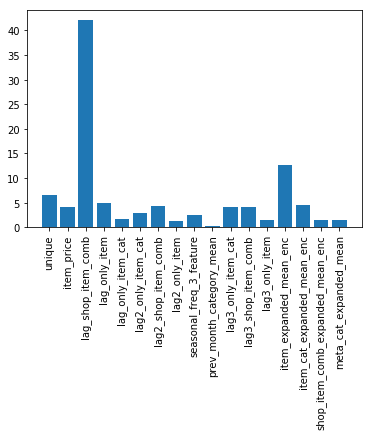

In [304]:
plt.figure()
plt.bar(train_33_for_models.drop('item_cnt_month',axis = 1).columns.values, feat_imp)
plt.xticks(rotation = 90)
plt.show()

In [405]:
for_lr = train_full_for_models.dropna()

In [406]:
lm_model_for_cat = LinearRegression().fit(for_lr.drop('item_cnt_month',axis = 1), for_lr['item_cnt_month'])

In [408]:
lm_model_for_val_cat = LinearRegression().fit(train_33_for_models.drop('item_cnt_month',axis = 1), train_33_for_models['item_cnt_month'])

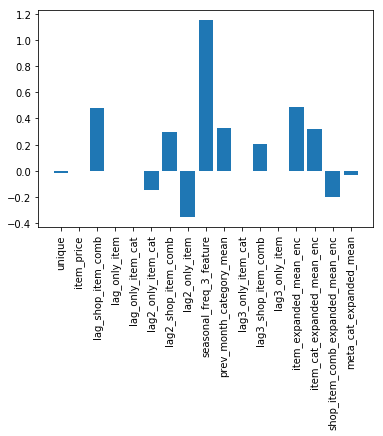

In [308]:
plt.bar(for_lr.drop('item_cnt_month', axis = 1).columns,lm_model_for_cat.coef_)
plt.xticks(rotation = 90)
plt.show()

In [309]:
#Making test features.

In [310]:
np.sum(pd.isnull(train_new),axis = 0)

shop_id                             0
item_id                             0
unique                              0
item_price                          0
item_cnt_month                      0
item_category_id                    0
is_music                            0
lag_shop_item_comb                  0
lag_only_item                       0
lag_only_item_cat                   0
lag2_only_item_cat                  0
lag2_shop_item_comb                 0
lag2_only_item                      0
seasonal_freq_3_feature             0
prev_month_category_mean            0
lag3_only_item_cat                  0
lag3_shop_item_comb                 0
lag3_only_item                      0
meta_item_cat                       0
item_expanded_mean_enc              0
item_cat_expanded_mean_enc          0
shop_item_comb_expanded_mean_enc    0
meta_cat_expanded_mean              0
dtype: int64

In [341]:
count = 0
for i in np.unique(test_full['item_id']):
    if i not in item_id_mean_enc.index.values:
        count+=1
    else:
        pass

In [358]:
item_id_mean_enc[5037]

2.8733031674208145

In [330]:
test_full['item_expanded_mean_enc'] = test_full['item_id'].map(item_id_mean_enc)

In [331]:
test_full['item_cat_expanded_mean_enc '] = test_full['item_category_id'].map(item_cat_id_mean_enc)

In [365]:
#Aah wait fot this
test_full = test_full.merge(item_shop_item_mean_enc, on = ['shop_id','item_id'], how = 'left')

In [366]:
test_full.head()

,ID,shop_id,item_id,item_category_id,indicator,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,unique,...,neighbor4,neighbor5,lag3_only_item,lag3_shop_item_comb,lag3_only_item_cat,item_expanded_mean_enc,item_cat_expanded_mean_enc,meta_item_cat,meta_cat_expanded_mean,shop_item_mean_enc
0,0,5,5037,19.0,1,False,0.00,25.0,2443.00,34,...,5,4828,119.00,3.0,4667.00,2.873303,2.613152,Console Games,2.636059,1.444444
1,1,5,5320,NaN,0,0.5,0.25,10.5,2904.00,34,...,1576,2480,19.75,1.0,3011.00,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,19.0,2,False,1.00,42.0,2443.00,34,...,2844,966,150.00,1.0,4667.00,2.668421,2.613152,Console Games,2.636059,2.000000
3,3,5,5232,23.0,1,False,0.00,28.0,2203.00,34,...,2844,966,65.00,1.0,3650.00,1.855263,2.368892,Console Games,2.636059,1.000000
4,4,5,5268,NaN,0,0.0,0.25,3.5,1634.25,34,...,3920,4373,6.50,0.0,2510.25,NaN,NaN,NaN,NaN,NaN


In [367]:
test_full.rename(columns = {'shop_item_mean_enc':'shop_item_comb_expanded_mean_enc'}, inplace = True)

In [335]:
test_full['meta_cat_expanded_mean'] = test_full['meta_item_cat'].map(meta_item_cat_enc)

In [336]:
test_full.rename(columns={'item_cat_expanded_mean_enc ': 'item_cat_expanded_mean_enc' }, inplace = True)

### direct mean encoding
### k-fold mean encoding
### expanded mean encoding all mean


#### All mean same for the test set, so chose only one encoding.

## I chose, expanded_mean encoding only

In [368]:
np.sum(pd.isnull(test_full),axis = 0)

ID                                       0
shop_id                                  0
item_id                                  0
item_category_id                     15246
indicator                                0
is_music                                 0
lag_shop_item_comb                       0
lag_only_item                            0
lag_only_item_cat                        0
unique                                   0
lag2_only_item_cat                       0
lag2_only_item                           0
lag2_shop_item_comb                      0
seasonal_freq_3_feature                  0
prev_month_category_mean                 0
item_price                               0
neighbor1                                0
neighbor2                                0
neighbor3                                0
neighbor4                                0
neighbor5                                0
lag3_only_item                           0
lag3_shop_item_comb                      0
lag3_only_i

In [370]:
test_for_prediction = test_full.copy()[train_full_for_models.drop('item_cnt_month',axis= 1).columns]

In [373]:
len(test_for_prediction.columns)

17

In [375]:
len(train_33_for_models.columns)

18

In [376]:
catboost_pred = cat_1_boost.predict(test_for_prediction)

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


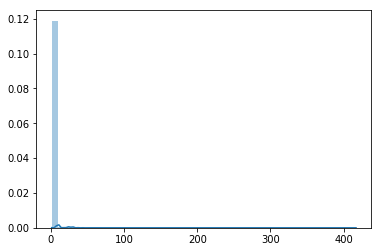

In [379]:
sns.distplot(catboost_pred)
plt.show()

In [380]:
catboost_pred[catboost_pred > 20 ] = 20

In [381]:
catboost_pred[catboost_pred < 0 ] = 0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


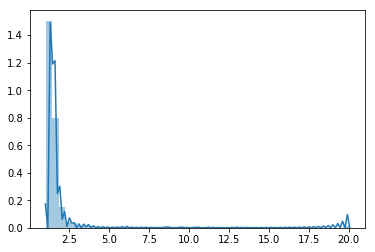

In [382]:
sns.distplot(catboost_pred)
plt.show()

In [396]:
np.mean(catboost_pred) - 1.4

0.3083655852409617

In [ ]:
#Huh, expect a bad score.

In [397]:
prediction_cat_reduced = catboost_pred - 1.4

In [398]:
prediction_cat_reduced[prediction_cat_reduced > 20 ] = 20

In [399]:
prediction_cat_reduced[prediction_cat_reduced < 0 ] = 0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


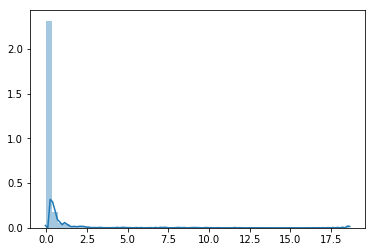

In [400]:
sns.distplot(prediction_cat_reduced)
plt.show()

In [401]:
catboost_prob_1point5 = pd.DataFrame({'ID':test_full['ID'], 'item_cnt_month':prediction_cat_reduced})

In [402]:
catboost_prob_1point5.shape

(214200, 2)

In [403]:
catboost_prob_1point5.to_csv('catboost_prob_1point5.csv', index = False)

In [ ]:
lm_tp

In [411]:
from tqdm import tqdm

In [412]:
#First finding best alpha for ensembling on val set. alpha*lin + (1-alpha)*xgb
alphas = np.arange(0,1,0.001)
best_alpha = 0
for_xg = cat_1_boost.predict(val_33_for_models.drop('item_cnt_month', axis = 1))
for_lm = lm_model_for_val_cat.predict(val_33_for_models.drop('item_cnt_month', axis = 1))
best_error = compute_trimmed_rmse(for_xg.copy(),val_33_for_models['item_cnt_month'].copy())
for alpha in tqdm(alphas):
    temp_pred = alpha*for_lm + (1-alpha)*for_xg
    temp_error = compute_trimmed_rmse(temp_pred.copy() , val_33_for_models['item_cnt_month'].copy())
    if (temp_error < best_error):
        best_alpha= alpha
        best_error = temp_error

100%|██████████| 1000/1000 [00:11<00:00, 88.58it/s]


In [413]:
best_alpha

0.134

In [ ]:
#Ensemble for non-nan values.
#catboost for nan values.

In [471]:
np.sum(pd.isnull(test_for_prediction),axis = 0)

unique                                   0
item_price                               0
lag_shop_item_comb                       0
lag_only_item                            0
lag_only_item_cat                        0
lag2_only_item_cat                       0
lag2_shop_item_comb                      0
lag2_only_item                           0
seasonal_freq_3_feature                  0
prev_month_category_mean                 0
lag3_only_item_cat                       0
lag3_shop_item_comb                      0
lag3_only_item                           0
item_expanded_mean_enc               15288
item_cat_expanded_mean_enc           15246
shop_item_comb_expanded_mean_enc    103964
meta_cat_expanded_mean               15246
dtype: int64

In [470]:
np.sum(pd.isnull(test_full),axis = 0)

ID                                       0
shop_id                                  0
item_id                                  0
item_category_id                     15246
indicator                                0
is_music                                 0
lag_shop_item_comb                       0
lag_only_item                            0
lag_only_item_cat                        0
unique                                   0
lag2_only_item_cat                       0
lag2_only_item                           0
lag2_shop_item_comb                      0
seasonal_freq_3_feature                  0
prev_month_category_mean                 0
item_price                               0
neighbor1                                0
neighbor2                                0
neighbor3                                0
neighbor4                                0
neighbor5                                0
lag3_only_item                           0
lag3_shop_item_comb                      0
lag3_only_i

In [472]:
test_set_for_prediction_no_na = test_for_prediction.copy().dropna()

In [437]:
test_set_for_prediction_only_na = test_for_prediction.copy()[test_for_prediction.isnull().any(axis = 1)]

In [438]:
no_na_preds = (1-0.134)*cat_1_boost.predict(test_set_for_prediction_no_na) + 0.134*lm_model_for_cat.predict(test_set_for_prediction_no_na)

In [439]:
only_na_preds = cat_1_boost.predict(test_set_for_prediction_only_na)

In [440]:
index_no_na = pd.concat([pd.DataFrame(test_set_for_prediction_no_na.index.values),pd.DataFrame(no_na_preds)], axis = 1)

In [441]:
index_no_na.columns = ['index','item_cnt_month']

In [442]:
index_only_na = pd.concat([pd.DataFrame(test_set_for_prediction_only_na.index.values),pd.DataFrame(only_na_preds)], axis = 1)

In [443]:
index_only_na.columns = ['index','item_cnt_month']

In [444]:
index_only_na['item_cnt_month'] = 0

In [445]:
final_pred = pd.concat([index_no_na,index_only_na], axis = 0)

In [446]:
final_pred_sorted = final_pred.sort_values("index").copy()

In [447]:
final_pred_sorted.index = final_pred_sorted['index']

In [448]:
sum(test_full['ID'].values != final_pred_sorted.index.values)

0

In [449]:
final_pred_sorted.drop('index',axis = 1, inplace = True)

In [450]:
for_submit = pd.concat([test_full['ID'],final_pred_sorted], axis = 1)

In [451]:
sum(for_submit['ID'].values != for_submit.index.values)

0

In [452]:
for_submit.shape

(214200, 2)

In [453]:
cat_lm_alpha0poin134 = for_submit.copy()

In [454]:
cat_lm_alpha0poin134.loc[cat_lm_alpha0poin134['item_cnt_month'] >  20, 'item_cnt_month'] = 20
cat_lm_alpha0poin134.loc[cat_lm_alpha0poin134['item_cnt_month'] <  0, 'item_cnt_month'] = 0

In [456]:
np.mean(cat_lm_alpha0poin134['item_cnt_month'])

0.78471831866866

In [461]:
max(cat_lm_alpha0poin134['item_cnt_month'])

20.0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


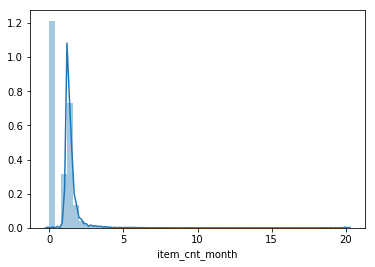

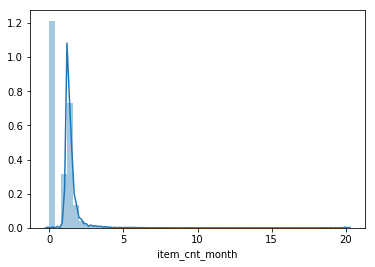

In [465]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sns.distplot(cat_lm_alpha0poin134['item_cnt_month'], ax=ax2)
display(fig2)
plt.show()

In [467]:
np.mean(cat_lm_alpha0poin134['item_cnt_month'])

0.78471831866866

In [468]:
cat_lm_alpha0poin134.to_csv('cat_lm_alpha0poin134.csv', index = False)

In [469]:
cat_lm_alpha0poin134.shape

(214200, 2)

In [474]:
best = pd.read_csv('ensemble_lin_xgb_0092_lag1_lag2_season.csv')

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


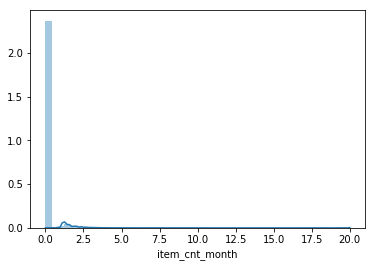

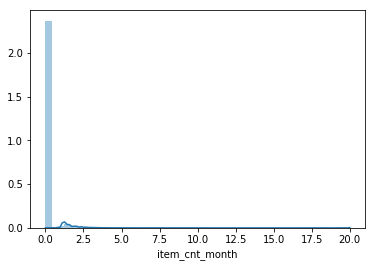

In [475]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sns.distplot(best['item_cnt_month'], ax=ax2)
display(fig2)
plt.show()

In [476]:
sum(best['item_cnt_month']==0)/len(best)

0.9467366946778711

In [477]:
sum(cat_lm_alpha0poin134['item_cnt_month']==0)/len(best)

0.485359477124183

In [480]:
??np.random.randn

In [492]:
random_prediction = np.random.randn(214200)

In [493]:
random_prediction = (random_prediction)*0.767 + 0.29

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


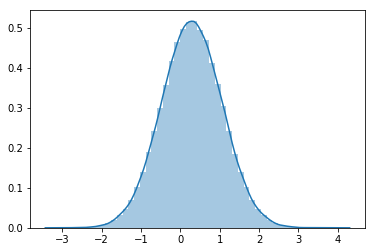

In [494]:
sns.distplot(random_prediction)
plt.show()

In [495]:
random_prediction[random_prediction<0] = 0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


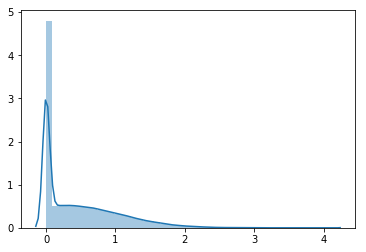

In [496]:
sns.distplot(random_prediction)
plt.show()